<a href="https://colab.research.google.com/github/yellayujin/studying/blob/main/240219_ML2(GridSearch%2C_%ED%94%BC%EC%B3%90%EC%97%94%EC%A7%80%EB%8B%88%EC%96%B4%EB%A7%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GridSearchCV
- 층화추출이 교차검증에 관련되어있다면, 이건 모델링에 집중됨
- 최적의 파라미터(매개변수)를 찾는 데 도움
    - max_depth: tree의 깊이. 지정 안 하면 이론상 무한대. 깊이가 커지면 모델 학습은 잘 하나 과적합 우려.
    - ...
- 캐글에서는 optuna, hyperoptuna 등이 이 역할을 하기도 함
- 디폴트 모델과 크-게 차이나지는 않을 수 있음


0.9777777777777777


[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7692307692307693, 0.3, 'x[0] <= 5.9

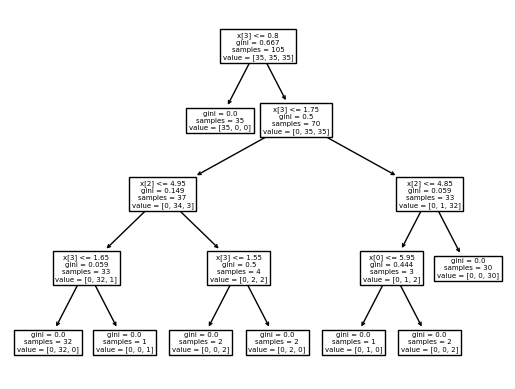

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target


# train, test분리
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0, stratify = y, test_size=0.3)

# 모델링
# 모델을 불러오기
clf = DecisionTreeClassifier(max_depth = None, random_state=0)   # max_depth를 결정하기 위한 게 GridSearchCV
 # 하나하나 해보면, 4부터 97.7777%

# 모델 학습
clf.fit(X_tr, y_tr)

# 예측 데이터 생성
y_te_pred = clf.predict(X_te)

# 모델 평가
print(accuracy_score(y_te_pred, y_te))

tree.plot_tree(clf)

# GridSearch vs. Random Search 차이점, 최근 트렌드 동향
    + 베이지안 서치
    + scikit-optimize, optuna, hyperopt
    + 보통 GridSearch와 RandomSearch 중 후자가 학습 시간 및 성능 우세

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_tr, X_te, y_tr, y_te = train_test_split(iris.data, iris.target,
                                                    test_size=0.3, random_state=0)
dtree = DecisionTreeClassifier()

# 파라미터 딕셔너리 형태로 설정
parameters = {
    "max_depth" : [1, 2, 3, 4],
    "min_samples_split" : [2, 3, 4]
}


grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit=True)
# refit: 가장 좋은 파라미터 설정으로 재학습시킴


# 원래는 model.fit(X_tr, y_tr)로 했는데, 지금은 아래처럼
grid_dtree.fit(X_tr, y_tr)


# 총 12번 계산됨(max_depth랑 min_samples_split에 있는 값들 하나하나 해보니까)
# 결과 추출
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003335,0.000940,0.002666,0.000942,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.685714,0.685714,0.714286,0.695238,0.013469,10
1,0.002326,0.000458,0.002002,0.001414,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.685714,0.685714,0.714286,0.695238,0.013469,10
2,0.002671,0.000474,0.001998,0.000819,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.685714,0.685714,0.714286,0.695238,0.013469,10
3,0.006000,0.002162,0.003999,0.002161,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.885714,1.000000,0.942857,0.942857,0.046657,7
4,0.002998,0.000821,0.002333,0.000471,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.885714,0.971429,0.942857,0.933333,0.035635,9
5,0.005335,0.001698,0.004331,0.002864,2,4,"{'max_depth': 2, 'min_samples_split': 4}",0.885714,1.000000,0.942857,0.942857,0.046657,7
6,0.005666,0.004496,0.001999,0.000816,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.942857,1.000000,0.942857,0.961905,0.026937,1
7,0.003667,0.002494,0.007334,0.006127,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.942857,1.000000,0.942857,0.961905,0.026937,1
8,0.002663,0.000937,0.003000,0.001632,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.942857,1.000000,0.942857,0.961905,0.026937,1
9,0.004002,0.001412,0.003334,0.001244,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.942857,0.971429,0.942857,0.952381,0.013469,5


In [ ]:
# 최적의 파라미터
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
# 그 때의 성능
grid_dtree.best_score_

0.9619047619047619

In [ ]:
# 재학습한걸로 예측
estimator = grid_dtree.best_estimator_
estimator

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred = estimator.predict(X_te)
accuracy_score(y_te, pred)

0.9777777777777777

# 데이터 가공
- 쓰지 않을 컬럼 삭제
- 행 추출(조건문 부여, 이상치 제거 등)
- 파생변수

# 데이터 전처리(Feature Engineering)
- 인코딩 변환(문자 컬럼을 숫자 컬럼으로)
- feature scaling(숫자 칼럼을 표준화, 정규화 등)
- 주성분분석(PCA): 숫자 컬럼을 적절하게 줄여주는 역할, 차원축소
- 요인분석(Factor Analysis): 숫자 및 문자 컬럼을 적절하게 줄여주는 역할


## LabelEncoder
- 주로 종속변수에 적용
- 몇몇 ML 알고리즘(회귀, SVM 등처럼 수치에 민감한 알고리즘)에는 무지성 적용 곤란(트리 계열은 상관 없음) (p.118)


In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

le = LabelEncoder()
le.fit(items)
labels = le.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [ ]:
le.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [ ]:
le.inverse_transform([4, 5, 2])

array(['전자레인지', '컴퓨터', '믹서'], dtype='<U5')

In [ ]:
le.inverse_transform(labels)

array(['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U5')

## 원핫인코딩
- LabelEncoder과의 차이점 확인
-

In [ ]:
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 2차원 ndarray로 변환한다.
items1 = np.array(items).reshape(-1, 1)
print(items1)
items1.shape  # 2차원으로 나옴

[['TV']
 ['냉장고']
 ['전자레인지']
 ['컴퓨터']
 ['선풍기']
 ['선풍기']
 ['믹서']
 ['믹서']]


(8, 1)

In [ ]:
# 원핫인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(items1)   # 이 items1는 지금 2차원 배열임
oh_labels = oh_encoder.transform(items1)
print(oh_labels)
print(oh_labels.toarray())

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
# Pandas-get_dummies
# 대상 컬럼의 고윳값수만큼 행이 새로 생겨
# 고윳값 갯수 많으면 -> 데이터 사이즈 커짐 -> 학습시간 오래 걸림
# 고윳값 갯수 많으면 따라서 적절히 범주화 or 삭제 등 갯수 줄여야
df = pd.DataFrame({'item':items })
pd.get_dummies(df, dtype=int)  # dtype=int

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [ ]:
# 방식 1
df1 = df[:]
unique = df1['item'].unique()
df1[unique] = pd.get_dummies(df1['item'], dtype=int)
df1

C:\Users\skrtk\AppData\Local\Temp\ipykernel_12144\4290872804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[unique] = pd.get_dummies(df1['item'], dtype=int)
C:\Users\skrtk\AppData\Local\Temp\ipykernel_12144\4290872804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[unique] = pd.get_dummies(df1['item'], dtype=int)
C:\Users\skrtk\AppData\Local\Temp\ipykernel_12144\4290872804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,item,TV,냉장고,전자레인지,컴퓨터,선풍기,믹서
0,TV,1,0,0,0,0,0
1,냉장고,0,1,0,0,0,0
2,전자레인지,0,0,0,0,1,0
3,컴퓨터,0,0,0,0,0,1
4,선풍기,0,0,0,1,0,0
5,선풍기,0,0,0,1,0,0
6,믹서,0,0,1,0,0,0
7,믹서,0,0,1,0,0,0


In [ ]:
# 방식 2
df2 = df[:]
unique = df2['item'].unique()
df2_dm = pd.get_dummies(df2, columns=['item'], dtype=int)

df2 = pd.concat([df2, df2_dm], axis=1)
df2

,item,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,TV,1,0,0,0,0,0
1,냉장고,0,1,0,0,0,0
2,전자레인지,0,0,0,0,1,0
3,컴퓨터,0,0,0,0,0,1
4,선풍기,0,0,0,1,0,0
5,선풍기,0,0,0,1,0,0
6,믹서,0,0,1,0,0,0
7,믹서,0,0,1,0,0,0


## 피쳐 스케일링과 정규화
- ML 알고리즘에 상관 없이, 기본값으로 사용
- 수치 데이터, 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
    + 판매데이터
        - 광고투입비용, 온도, 판매량, 매출액 : 단위 다름
- 트리 계열 알고리즘
    + 굳이 표준화, 정규화 필요 없음 => cuz 단위, 스케일링 차이가 분할 기준에 영향 주지 않음
-MinMax, StandardScaler, RobustScaler 등 여러 종류 있음
    + RobustScaler: 이상치 있을 때 유용
    + https://scikit-learn.org/stable/modules/preprocessing.html

### StandardScaler
- 평균이 0이고, 분산이 1인 값으로 변환해준다.
    - 표준정규분포


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
# StandardScaler 객체 생성
 # 각 피처, 수치형 컬럼 한 번에 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)     # 참고, iris데이터는 모든 단위가 cm라서 여기서는 굳이 할 필요 없음. cm, kg과 같을 때 하세용
iris_sc = scaler.transform(iris_df)
# iris_sc   # array
iris_sc_df = pd.DataFrame(data=iris_sc, columns = iris.feature_names)
# iris_sc_df

print('feature 들의 평균 값')
print(iris_sc_df.mean())
print('\nfeature 들의 분산 값')
print(iris_sc_df.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
- 데이터 값을 0과 1사이의 값으로 (음수값 있으면 -1~1로)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_sc = scaler.transform(iris_df)
iris_sc_df = pd.DataFrame(data=iris_sc, columns = iris.feature_names)
# iris_sc_df

print('feature 들의 평균 값')
print(iris_sc_df.mean())
print('\nfeature 들의 분산 값')
print(iris_sc_df.var())

feature 들의 평균 값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


### 스케일링 변환 시 유의점
- p.126(파이썬 머신러닝 완벽 가이드)

## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('data/titanic_train.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna('N')
data['Embarked'] = data['Embarked'].fillna('N')
print(data.isnull().sum().sum())

# inplace warning 뜸. thus 위와 같이 작성함
# C:\Users\skrtk\AppData\Local\Temp\ipykernel_12144\3545948455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

0


In [ ]:
data['Cabin'].value_counts()
# 속성값이 제대로 정리되지 않은 것 같음. 앞 문자만 추출해보자.

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [ ]:
data['Cabin'] = data['Cabin'].str[:1]
print(data['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object
